In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                            roc_auc_score, confusion_matrix, log_loss,
                            mean_squared_error)

from sklearn.preprocessing import RobustScaler
from imblearn.combine import SMOTETomek

In [2]:
df=pd.read_csv("Rainfall.csv")

In [3]:
df

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [4]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [5]:
df.rename(columns={
    "rainfall": "Target",
    "         winddirection":"winddirection"
                  }, inplace=True)

In [6]:
df

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,Target,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [7]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'Target', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [9]:
df["Target"].value_counts()

Target
yes    249
no     117
Name: count, dtype: int64

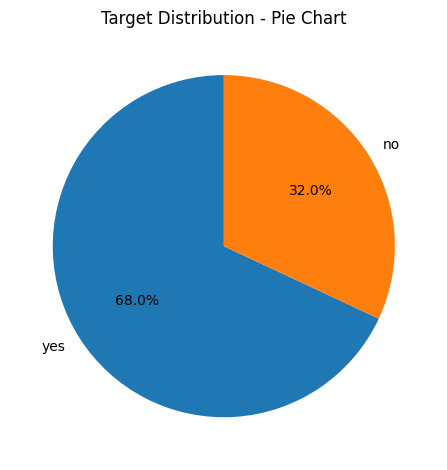

In [10]:
df["Target"].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=90, shadow=False)
plt.title("Target Distribution - Pie Chart")
plt.ylabel("")  # hide y-axis label
plt.tight_layout()
plt.show()

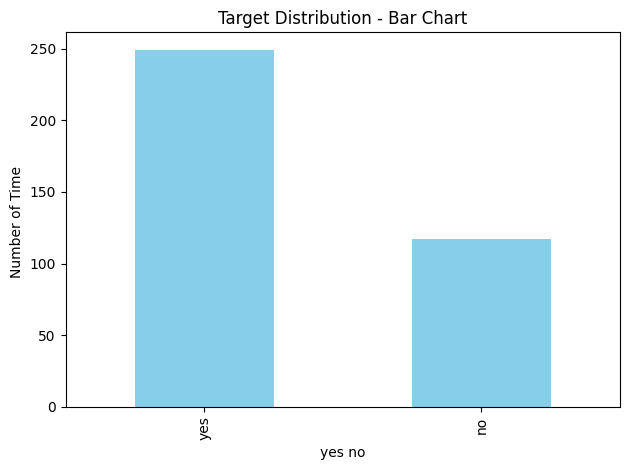

In [11]:
df["Target"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Target Distribution - Bar Chart")
plt.xlabel("yes no")
plt.ylabel("Number of Time ")
plt.tight_layout()
plt.show()

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
if df.duplicated().sum():
    df.drop_duplicated()

In [14]:
df["Target"] = df["Target"].map({"yes":1, "no":0})

In [15]:
df["Target"].value_counts()

Target
1    249
0    117
Name: count, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   Target         366 non-null    int64  
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 34.4 KB


In [17]:
df

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,Target,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,1,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,1,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,1,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,1,1.2,20.0,20.9


In [18]:
df1=df.copy()

In [19]:
df1

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,Target,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,1,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,1,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,1,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,1,1.2,20.0,20.9


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   Target         366 non-null    int64  
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 34.4 KB


In [21]:
df1.isna().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
Target           0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [22]:
df1["winddirection"].value_counts()

winddirection
20.0     47
70.0     39
40.0     33
50.0     32
220.0    27
60.0     24
80.0     23
230.0    20
30.0     17
10.0     15
200.0    10
190.0     9
240.0     8
90.0      7
100.0     7
210.0     6
180.0     6
130.0     5
110.0     4
270.0     3
120.0     3
160.0     3
170.0     3
300.0     2
150.0     2
250.0     2
280.0     2
140.0     2
290.0     2
260.0     1
350.0     1
Name: count, dtype: int64

In [23]:
df1["windspeed"].value_counts()

windspeed
14.5    6
20.5    5
15.3    4
25.0    4
17.2    4
       ..
15.0    1
9.4     1
27.6    1
18.4    1
33.4    1
Name: count, Length: 223, dtype: int64

In [24]:
if df1.isna:
    df1.dropna(inplace=True)

In [25]:
df1.isna().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
Target           0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [26]:
df1

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,Target,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,1,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,1,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,1,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,1,1.2,20.0,20.9


In [27]:
df2=df1.copy()

In [28]:
df2['day'].value_counts()

day
1     12
2     12
3     12
4     12
5     12
6     12
7     12
8     12
10    12
11    12
12    12
14    12
13    12
15    12
16    12
24    12
17    12
18    12
19    12
20    12
21    12
22    12
23    12
28    12
25    12
26    12
27    12
29    12
9     11
30    11
31     7
Name: count, dtype: int64

In [29]:
df1=df2.copy()

In [30]:
df1

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,Target,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,1,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,1,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,1,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,1,1.2,20.0,20.9


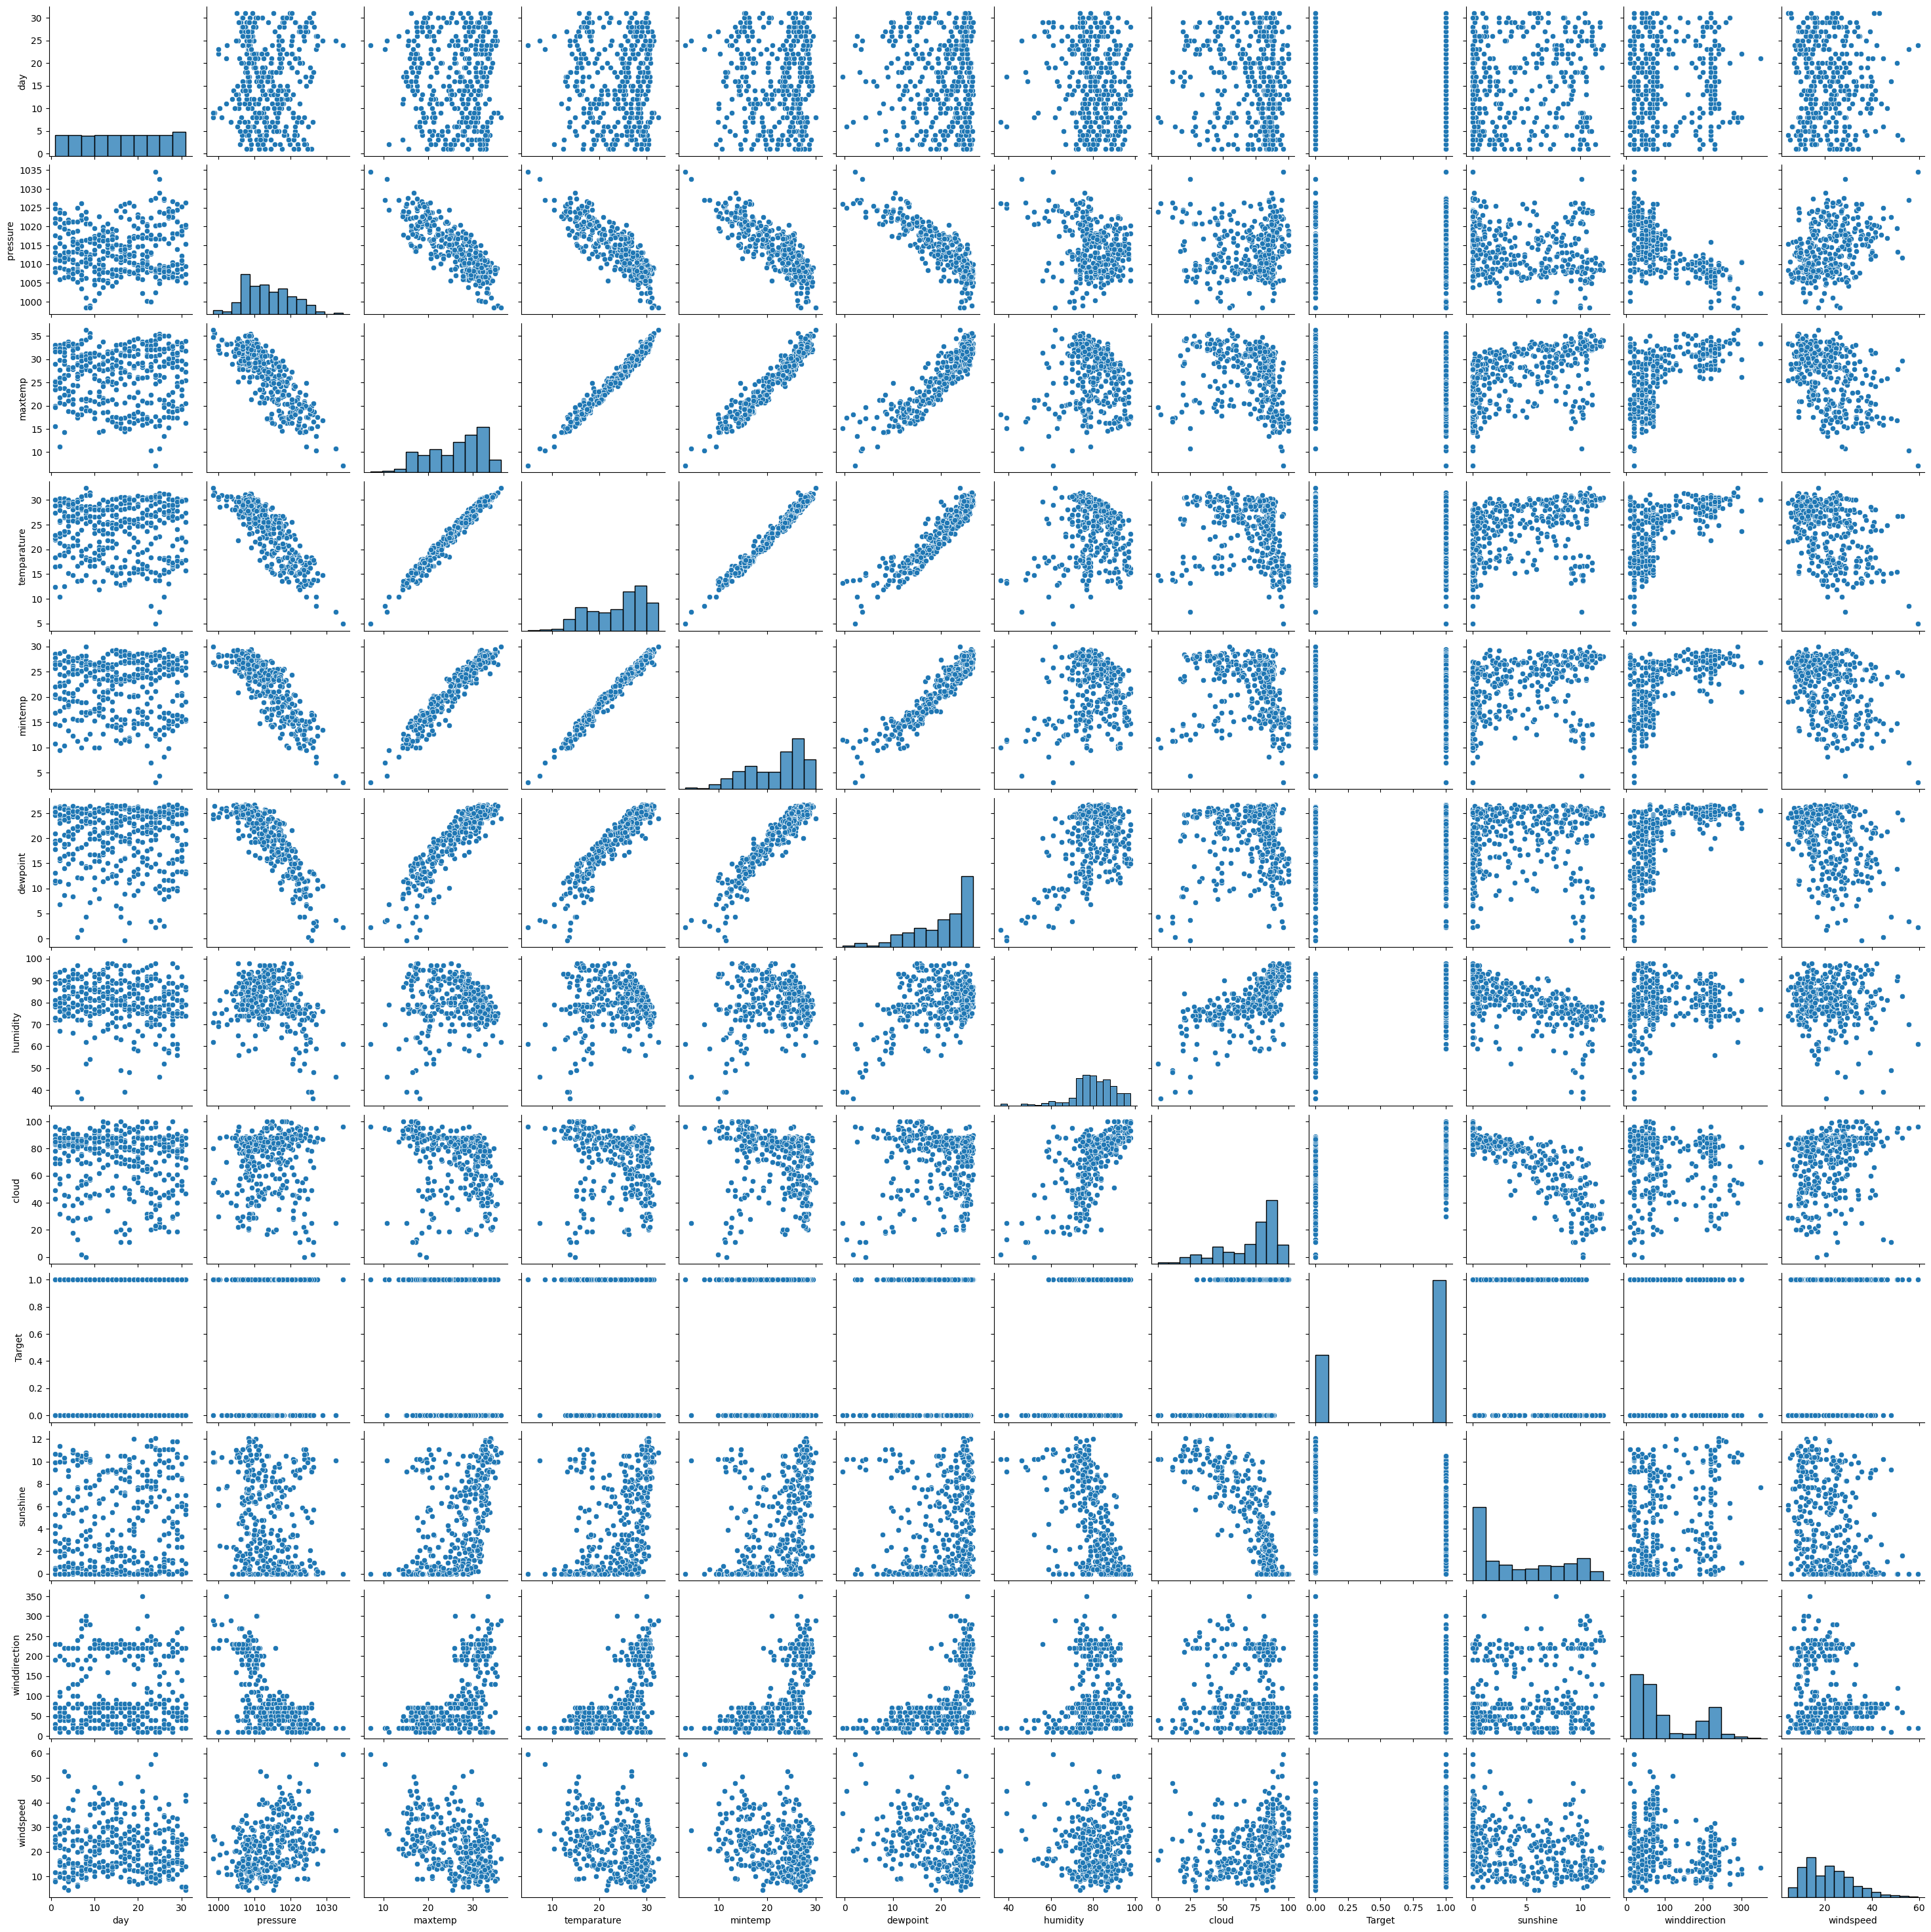

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df1)

# Show plot
plt.show()


In [32]:
X=df1.drop(columns={'Target'})
y=df1['Target']

In [33]:
X

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,1.2,20.0,20.9


In [34]:
y

0      1
1      1
2      1
3      1
4      1
      ..
361    1
362    1
363    1
364    1
365    0
Name: Target, Length: 365, dtype: int64

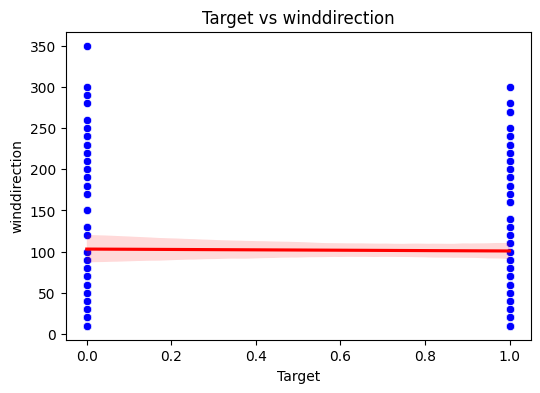

In [36]:
# Scatter plot to see dependency
plt.figure(figsize=(6, 4))
sns.scatterplot(x="Target", y="winddirection", data=df, color="blue")

# Add regression line (optional, to show trend)
sns.regplot(x="Target", y="winddirection", data=df, scatter=False, color="red")

plt.title("Target vs winddirection")
plt.xlabel("Target")
plt.ylabel("winddirection")
plt.show()

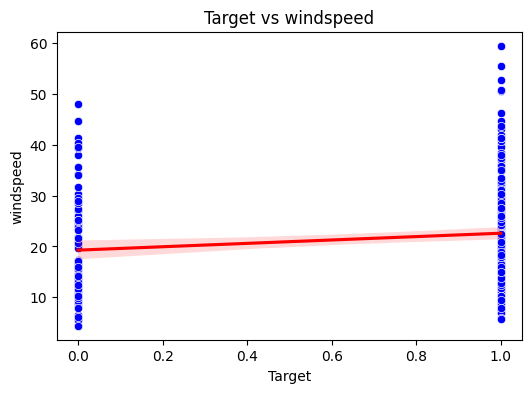

In [37]:
# Scatter plot to see dependency
plt.figure(figsize=(6, 4))
sns.scatterplot(x="Target", y="windspeed", data=df, color="blue")

# Add regression line (optional, to show trend)
sns.regplot(x="Target", y="windspeed", data=df, scatter=False, color="red")

plt.title("Target vs windspeed")
plt.xlabel("Target")
plt.ylabel("windspeed")
plt.show()

In [42]:
y.value_counts()

Target
1    248
0    117
Name: count, dtype: int64

In [43]:
smt = SMOTETomek(random_state = 42)
x_bal, y_bal = smt.fit_resample(X, y)

In [45]:
y_bal.value_counts()

Target
1    240
0    240
Name: count, dtype: int64

In [46]:
df_b=x_bal.copy()
df_b['Target']=y
df_b

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,Target
0,1,1025.900000,19.900000,18.300000,16.800000,13.100000,72,49,9.300000,80.000000,26.300000,1.0
1,2,1022.000000,21.700000,18.900000,17.200000,15.600000,81,83,0.600000,50.000000,15.300000,1.0
2,3,1019.700000,20.300000,19.300000,18.000000,18.400000,95,91,0.000000,40.000000,14.200000,1.0
3,4,1018.900000,22.300000,20.600000,19.100000,18.800000,90,88,1.000000,50.000000,16.900000,1.0
4,5,1015.900000,21.300000,20.700000,20.200000,19.900000,95,81,0.000000,40.000000,13.700000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
475,7,1023.022189,19.280547,17.300000,15.417021,12.138906,72,86,0.892705,10.243160,21.851064,NaN
476,19,1028.275336,13.640078,11.143739,8.947401,1.053564,41,25,9.454528,20.000000,33.153759,NaN
477,24,1020.735160,22.312795,20.100263,17.159662,11.772195,58,44,8.706266,58.228893,39.406266,NaN
478,5,1013.377404,26.500000,23.094046,21.470229,21.546413,90,83,6.626109,68.809172,19.356953,NaN


In [49]:
scaler_RS = RobustScaler()
x_scaled = pd.DataFrame(scaler_RS.fit_transform(x_bal),columns=x_bal.columns)
x_scaled

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,-1.000000,1.199817,-0.752518,-0.700935,-0.691400,-0.887701,-0.500000,-0.650,0.498918,0.072054,0.420973
1,-0.933333,0.825474,-0.575399,-0.640855,-0.649812,-0.620321,0.250000,0.200,-0.565693,-0.144108,-0.338158
2,-0.866667,0.604708,-0.713158,-0.600802,-0.566636,-0.320856,1.416667,0.400,-0.639114,-0.216163,-0.414071
3,-0.800000,0.527920,-0.516360,-0.470628,-0.452269,-0.278075,1.000000,0.325,-0.516745,-0.144108,-0.227739
4,-0.733333,0.239963,-0.614759,-0.460615,-0.337902,-0.160428,1.416667,0.150,-0.639114,-0.216163,-0.448577
...,...,...,...,...,...,...,...,...,...,...,...
475,-0.600000,0.923590,-0.813472,-0.801069,-0.835189,-0.990491,-0.500000,0.275,-0.529875,-0.430573,0.113943
476,0.200000,1.427815,-1.368490,-1.417517,-1.507835,-2.176089,-3.083333,-1.250,0.517827,-0.360271,0.893964
477,0.533333,0.704068,-0.515101,-0.520668,-0.654006,-1.029712,-1.666667,-0.775,0.426263,-0.084816,1.325461
478,-0.733333,-0.002169,-0.103083,-0.220890,-0.205837,0.015659,1.000000,0.200,0.171716,-0.008580,-0.058180


train test

In [59]:
#xw, xv, yw, yv = train_test_split(dfx11,dfy11, test_size=0.3, stratify=dfy, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y_bal, test_size=0.3, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

mod = LogisticRegression()
mod.fit(X_train, y_train)

y_pred = mod.predict(X_test)   # 0/1 predictions
y_pred_prob = mod.predict_proba(X_test)[:,1]  # probabilities for class 1

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Log Loss:", log_loss(y_test, y_pred_prob))

print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Accuracy: 0.8125
Precision: 0.8243243243243243
Recall: 0.8133333333333334
F1 Score: 0.8187919463087249
ROC-AUC: 0.8923671497584541
Confusion Matrix:
 [[56 13]
 [14 61]]
Log Loss: 0.41863029260372603
MSE: 0.1875
RMSE: 0.4330127018922193
